## student performance prediction with all features

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
data=pd.read_csv("C://Users//DISHA_COMPUTER//Documents//student performance dataset ....csv")


In [6]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


In [66]:
# Gender = 0- male , 1- female 
# parental education = o- none,1- high school,2-some college ,3-bachleor,4-higher
# tutoring = 0- no ,1-yes
# parental support = 0-none,1-low,2-moderate ,3-high,4-very high
# Extracurricular	= 0- no,1-yes
# Sports= 0- no,1-yes
# Music	= 0-no,1-yes
# Volunteering=0-no ,1-yes

In [7]:
missing_value = data.isnull().sum()
missing_value

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 280.4 KB


In [9]:
data.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [10]:
data.drop(["GPA","StudentID"],axis=1,inplace=True)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

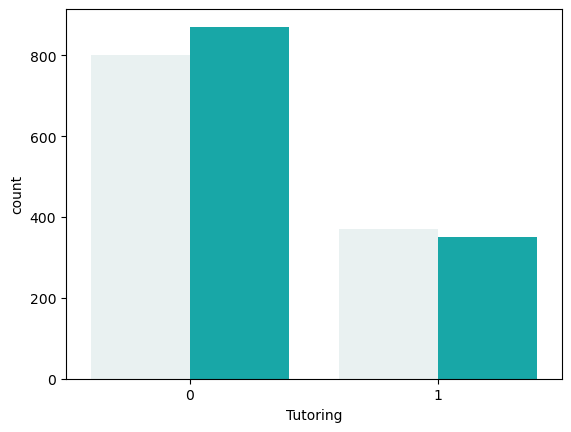

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=data["Tutoring"],hue=data['Gender'], data=data,color="c")
plt.title("tutoring distribution by sex")

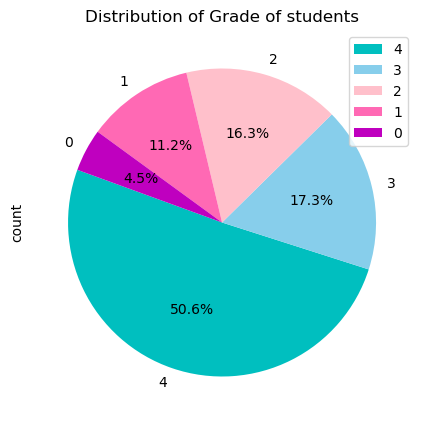

In [15]:
# pie chart
data["GradeClass"].value_counts().plot.pie(autopct="%1.1f%%",figsize=(5,5),startangle=160,colors=['c','skyblue','Pink','hotpink','m'])
plt.title('Distribution of Grade of students')
plt.legend()

#### 0 = A grade class
#### 1 = B grade class
#### 2 = C grade class
#### 3 = D grade class
#### 4 = E grade class

###  from the pie chart we conclude that most student get "E" Grade class  . 4.5% students get Grade class A 

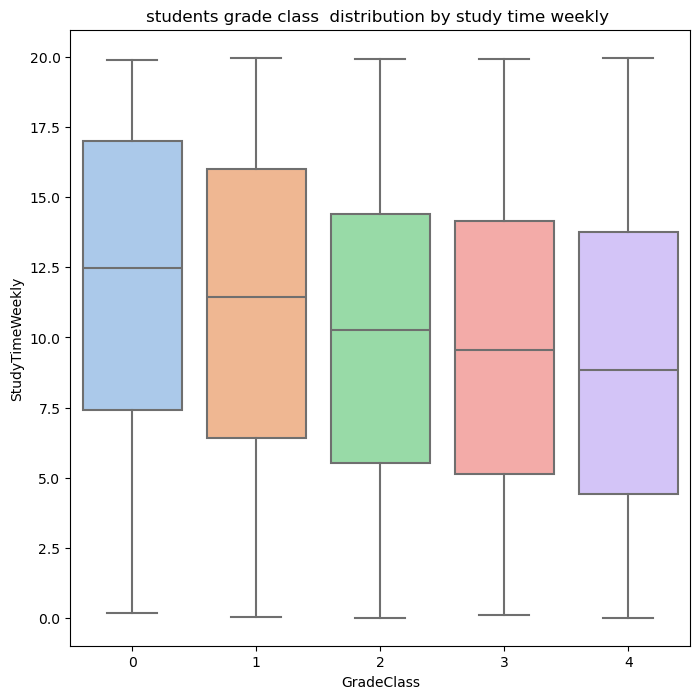

In [16]:
# Boxplot
plt.figure(figsize=(8, 8))
sns.boxplot(data=data, x='GradeClass', y='StudyTimeWeekly', palette='pastel')
plt.title('students grade class  distribution by study time weekly ')
plt.xlabel('GradeClass')
plt.ylabel('StudyTimeWeekly')
plt.show()

###  from graph we coclude that if study time weekly increases then get the high class grade and grade class A students study time is large than other grade class student 

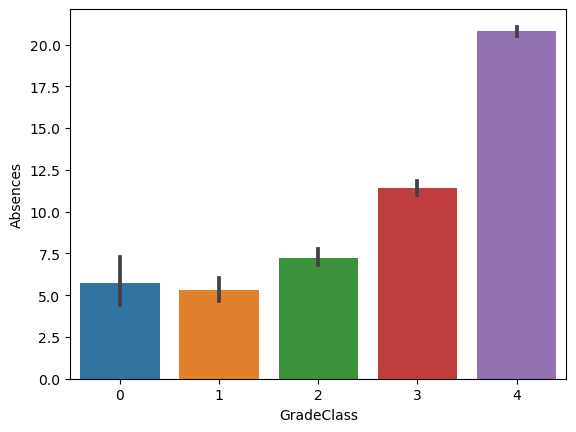

In [17]:
sns.barplot(x="GradeClass",y="Absences",data=data)
plt.show()

In [18]:
# Train and test split
from sklearn.model_selection import train_test_split
X=data[['Age','Gender','ParentalEducation','StudyTimeWeekly','Absences','Tutoring','ParentalSupport','Extracurricular','Sports',"Ethnicity","Music","Volunteering"]]
Y=data["GradeClass"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, Y_train.shape,Y_test.shape

((1913, 12), (479, 12), (1913,), (479,))

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE( random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
unique, counts = np.unique(Y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 974, 1: 974, 2: 974, 3: 974, 4: 974}


##  1. Multinomial Naive Bayes algorithm 

In [20]:
from sklearn.naive_bayes import MultinomialNB
Mnb=MultinomialNB()
Mnb.fit(X_train_resampled,Y_train_resampled)
MNy_pred=Mnb.predict(X_test)

In [21]:
# Accuracy
from sklearn.metrics import accuracy_score
accur_score=accuracy_score(Y_test,MNy_pred)
print("Accuracy:",accur_score)

Accuracy: 0.5866388308977035


In [22]:
from sklearn.metrics import precision_recall_fscore_support
micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(Y_test, MNy_pred, average='micro')
micro_precision, micro_recall, micro_f1
print("micro_precision:",micro_precision)
print("micro_recall:",micro_recall)
print("micro_f1score:",micro_f1)

micro_precision: 0.5866388308977035
micro_recall: 0.5866388308977035
micro_f1score: 0.5866388308977035


In [23]:
# Classification report
from sklearn.metrics import classification_report
reportmny=classification_report(Y_test,MNy_pred)
print(reportmny)

              precision    recall  f1-score   support

           0       0.12      0.23      0.16        22
           1       0.34      0.45      0.39        49
           2       0.45      0.26      0.33        85
           3       0.40      0.48      0.43        86
           4       0.87      0.81      0.84       237

    accuracy                           0.59       479
   macro avg       0.43      0.44      0.43       479
weighted avg       0.62      0.59      0.60       479



## 2 . KNN algorithm 

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_resampled,Y_train_resampled)
ky_pred=classifier.predict(X_test)


In [25]:
# Accuracy
from sklearn.metrics import accuracy_score
knn_accur_score=accuracy_score(Y_test,ky_pred)
print("Accuracy:{knn_accur_score:.2f}")

Accuracy:{knn_accur_score:.2f}


In [26]:
from sklearn.metrics import precision_recall_fscore_support
micro_precision_knn, micro_recall_knn, micro_f1_knn, _ = precision_recall_fscore_support(Y_test, ky_pred, average='micro')
print("micro_precision:",micro_precision_knn)
print("micro_recall:",micro_recall_knn)
print("micro_f1score:",micro_f1_knn)

micro_precision: 0.5302713987473904
micro_recall: 0.5302713987473904
micro_f1score: 0.5302713987473904


In [27]:
# Classification report
from sklearn.metrics import classification_report
reportky=classification_report(Y_test,ky_pred)
print(reportky)

              precision    recall  f1-score   support

           0       0.17      0.45      0.24        22
           1       0.29      0.43      0.35        49
           2       0.42      0.39      0.40        85
           3       0.41      0.47      0.44        86
           4       0.87      0.63      0.73       237

    accuracy                           0.53       479
   macro avg       0.43      0.47      0.43       479
weighted avg       0.62      0.53      0.56       479



## 3. Decision tree classfier 

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train_resampled,Y_train_resampled)
clf_pred=clf.predict(X_test)


In [29]:
feature_importance=clf.feature_importances_*100
importance_d=pd.DataFrame({"feature":X.columns,"Importance":feature_importance})
importance_d=importance_d.sort_values(by="Importance",ascending=False)
importance_d

,feature,Importance
4,Absences,32.930629
3,StudyTimeWeekly,25.776824
6,ParentalSupport,8.556904
2,ParentalEducation,6.312402
9,Ethnicity,5.763100
0,Age,5.699169
5,Tutoring,3.539675
8,Sports,2.967366
1,Gender,2.742701
7,Extracurricular,2.514735


In [30]:
# Accuracy 
acc=accuracy_score(Y_test,clf_pred)
acc


0.5845511482254697

In [31]:
from sklearn.metrics import precision_recall_fscore_support
micro_precision_dt, micro_recall_dt, micro_f1_dt, _ = precision_recall_fscore_support(Y_test, clf_pred, average='micro')
print("micro_precision:",micro_precision_dt)
print("micro_recall:",micro_recall_dt)
print("micro_f1score:",micro_f1_dt)

micro_precision: 0.5845511482254697
micro_recall: 0.5845511482254697
micro_f1score: 0.5845511482254697


In [32]:
# Classification report
from sklearn.metrics import classification_report
reportclfD=classification_report(Y_test,clf_pred)
print(reportclfD)

              precision    recall  f1-score   support

           0       0.17      0.18      0.17        22
           1       0.36      0.49      0.41        49
           2       0.43      0.47      0.45        85
           3       0.40      0.40      0.40        86
           4       0.85      0.75      0.80       237

    accuracy                           0.58       479
   macro avg       0.44      0.46      0.45       479
weighted avg       0.61      0.58      0.60       479



## 4. support vector machine 

In [33]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train_resampled,Y_train_resampled)
svmy_pred=model.predict(X_test)


In [34]:
# Accuracy
from sklearn.metrics import accuracy_score
accursvm_score=accuracy_score(Y_test,svmy_pred)
print("Accuracy:",accursvm_score)

Accuracy: 0.6638830897703549


In [35]:
# Classification report
from sklearn.metrics import classification_report
reportsvmy=classification_report(Y_test,svmy_pred)
print(reportsvmy)

              precision    recall  f1-score   support

           0       0.27      0.27      0.27        22
           1       0.46      0.49      0.48        49
           2       0.59      0.49      0.54        85
           3       0.45      0.65      0.53        86
           4       0.91      0.80      0.85       237

    accuracy                           0.66       479
   macro avg       0.54      0.54      0.53       479
weighted avg       0.69      0.66      0.67       479



In [36]:
from sklearn.metrics import precision_recall_fscore_support
micro_precision_svm, micro_recall_svm, micro_f1_svm, _ = precision_recall_fscore_support(Y_test, svmy_pred, average='micro')
print("micro_precision:",micro_precision_svm)
print("micro_recall:",micro_recall_svm)
print("micro_f1score:",micro_f1_svm)

micro_precision: 0.6638830897703549
micro_recall: 0.6638830897703549
micro_f1score: 0.6638830897703549


## 5. logistic regression 

In [37]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression(multi_class='auto',max_iter=1000)
l.fit(X_train_resampled,Y_train_resampled)
lry_pred=l.predict(X_test)

C:\Users\DISHA_COMPUTER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# Accuracy
accurlr_score=accuracy_score(Y_test,lry_pred)
print("Accuracy:",accurlr_score)

Accuracy: 0.5511482254697286


In [39]:
from sklearn.metrics import precision_recall_fscore_support
micro_precision_lry, micro_recall_lry, micro_f1_lry, _ = precision_recall_fscore_support(Y_test, lry_pred, average='micro')
print("micro_precision:",micro_precision_lry)
print("micro_recall:",micro_recall_lry)
print("micro_f1score:",micro_f1_lry)

micro_precision: 0.5511482254697286
micro_recall: 0.5511482254697286
micro_f1score: 0.5511482254697286


In [40]:
# Classification report
from sklearn.metrics import classification_report
reportlr=classification_report(Y_test,lry_pred)
print(reportlr)

              precision    recall  f1-score   support

           0       0.05      0.14      0.07        22
           1       0.29      0.35      0.32        49
           2       0.43      0.29      0.35        85
           3       0.38      0.34      0.36        86
           4       0.84      0.80      0.82       237

    accuracy                           0.55       479
   macro avg       0.40      0.38      0.38       479
weighted avg       0.60      0.55      0.57       479



## 6. Random forest classifier 

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train_resampled,Y_train_resampled)
rf_y_pred=rf_model.predict(X_test)


In [42]:
# Accuracy
accurrf_y_score=accuracy_score(Y_test,rf_y_pred)
print("Accuracy:",accurrf_y_score)

Accuracy: 0.6304801670146137


In [43]:
from sklearn.metrics import precision_recall_fscore_support
micro_precision_rfy, micro_recall_rfy, micro_f1_rfy, _ = precision_recall_fscore_support(Y_test, rf_y_pred, average='micro')
print("micro_precision:",micro_precision_rfy)
print("micro_recall:",micro_recall_rfy)
print("micro_f1score:",micro_f1_rfy)

micro_precision: 0.6304801670146137
micro_recall: 0.6304801670146137
micro_f1score: 0.6304801670146137


In [44]:
# Classification report
from sklearn.metrics import classification_report
reportrf=classification_report(Y_test,rf_y_pred)
print(reportrf)

              precision    recall  f1-score   support

           0       0.21      0.18      0.20        22
           1       0.41      0.53      0.46        49
           2       0.51      0.45      0.48        85
           3       0.41      0.42      0.42        86
           4       0.84      0.84      0.84       237

    accuracy                           0.63       479
   macro avg       0.48      0.48      0.48       479
weighted avg       0.63      0.63      0.63       479



## 7  Gradient Boosting  Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
gb_model=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=42)
gb_model.fit(X_train_resampled,Y_train_resampled)
gbcy_pred=rf_model.predict(X_test)


In [47]:
# Accuracy
accurgb_y_score=accuracy_score(Y_test,gbcy_pred)
print("Accuracy:",accurgb_y_score)

Accuracy: 0.6304801670146137


In [48]:
from sklearn.metrics import precision_recall_fscore_support
micro_precision_gbc, micro_recall_gbc, micro_f1_gbc, _ = precision_recall_fscore_support(Y_test, gbcy_pred, average='micro')
print("micro_precision:",micro_precision_gbc)
print("micro_recall:",micro_recall_gbc)
print("micro_f1score:",micro_f1_gbc)

micro_precision: 0.6304801670146137
micro_recall: 0.6304801670146137
micro_f1score: 0.6304801670146137


In [49]:
# Classification report
from sklearn.metrics import classification_report
reportgbc=classification_report(Y_test,gbcy_pred)
print(reportgbc)

              precision    recall  f1-score   support

           0       0.21      0.18      0.20        22
           1       0.41      0.53      0.46        49
           2       0.51      0.45      0.48        85
           3       0.41      0.42      0.42        86
           4       0.84      0.84      0.84       237

    accuracy                           0.63       479
   macro avg       0.48      0.48      0.48       479
weighted avg       0.63      0.63      0.63       479



##  8 .  BaggingClassifier

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(random_state=42)
bagging_clf = BaggingClassifier(estimator=base_estimator, n_estimators=100, random_state=42)
bagging_clf.fit(X_train_resampled, Y_train_resampled)
ybg_pred = bagging_clf.predict(X_test)

In [51]:
# Accuracy
accuracy = accuracy_score(Y_test, ybg_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.67


In [52]:
from sklearn.metrics import precision_recall_fscore_support
micro_precision_bg, micro_recall_bg, micro_f1_bg, _ = precision_recall_fscore_support(Y_test, ybg_pred, average='micro')
print("micro_precision:",micro_precision_bg)
print("micro_recall:",micro_recall_bg)
print("micro_f1score:",micro_f1_bg)

micro_precision: 0.6701461377870563
micro_recall: 0.6701461377870563
micro_f1score: 0.6701461377870563


In [53]:
# Classification report
from sklearn.metrics import classification_report
reportbg=classification_report(Y_test,ybg_pred)
print(reportbg)

              precision    recall  f1-score   support

           0       0.36      0.36      0.36        22
           1       0.44      0.55      0.49        49
           2       0.55      0.51      0.53        85
           3       0.49      0.50      0.49        86
           4       0.87      0.84      0.86       237

    accuracy                           0.67       479
   macro avg       0.54      0.55      0.55       479
weighted avg       0.68      0.67      0.67       479



##  10 Linear Discriminant Analysis

In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ld=LDA()
ld.fit(X_train_resampled, Y_train_resampled)
y_predld=ld.predict(X_test)

In [88]:
# Accuracy
accuracy = accuracy_score(Y_test, y_predld)
accuracy 

0.5511482254697286

In [89]:
# Classification report
from sklearn.metrics import classification_report
reportldy=classification_report(Y_test,y_predld)
print(reportldy)

              precision    recall  f1-score   support

           0       0.08      0.23      0.12        22
           1       0.24      0.24      0.24        49
           2       0.44      0.32      0.37        85
           3       0.36      0.35      0.36        86
           4       0.85      0.80      0.83       237

    accuracy                           0.55       479
   macro avg       0.39      0.39      0.38       479
weighted avg       0.59      0.55      0.57       479



In [55]:
from sklearn.metrics import precision_recall_fscore_support
micro_precision_lda, micro_recall_lda, micro_f1_lda, _ = precision_recall_fscore_support(Y_test, y_predld, average='micro')
print("micro_precision:",micro_precision_lda)
print("micro_recall:",micro_recall_lda)
print("micro_f1score:",micro_f1_lda)

micro_precision: 0.5511482254697286
micro_recall: 0.5511482254697286
micro_f1score: 0.5511482254697286


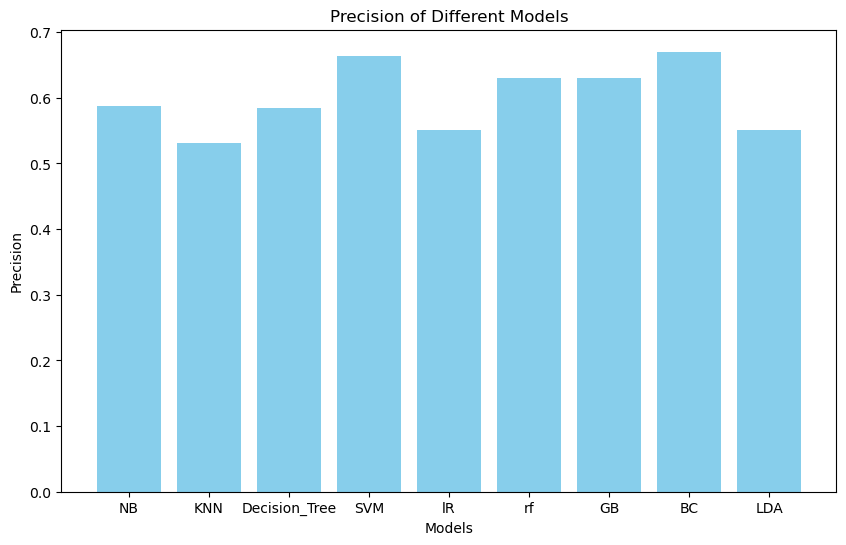

In [59]:
import matplotlib.pyplot as plt
import numpy as np
models = ["NB", "KNN", 'Decision_Tree', "SVM", "lR", 
          "rf", "GB", "BC", 
          "LDA"]
precision = [micro_precision , micro_precision_knn,micro_precision_dt,micro_precision_svm, micro_precision_lry,micro_precision_rfy,micro_precision_gbc, micro_precision_bg,micro_precision_lda]
plt.figure(figsize=(10, 6))
bars = plt.bar(models, precision, color='skyblue')  
plt.xlabel('Models') 
plt.ylabel('Precision')  
plt.title('Precision of Different Models')  

plt.show()

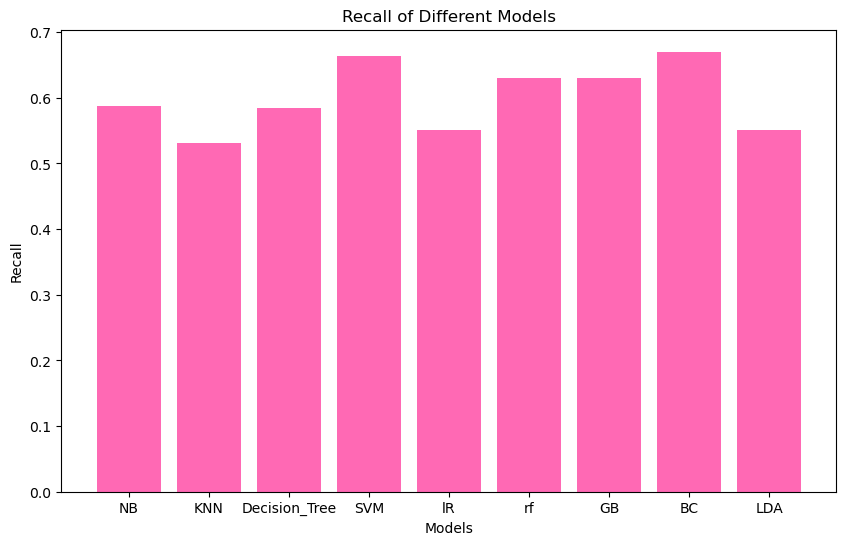

In [62]:
import matplotlib.pyplot as plt
import numpy as np
models = ["NB", "KNN", 'Decision_Tree', "SVM", "lR", 
          "rf", "GB", "BC", 
          "LDA"]
precision = [micro_recall , micro_recall_knn,micro_recall_dt,micro_recall_svm, micro_recall_lry,micro_recall_rfy,micro_recall_gbc, micro_recall_bg,micro_recall_lda]
plt.figure(figsize=(10, 6))
bars = plt.bar(models, precision, color='hotpink')  
plt.xlabel('Models')  # Label for x-axis
plt.ylabel('Recall')  # Label for y-axis
plt.title('Recall of Different Models')  
plt.show()

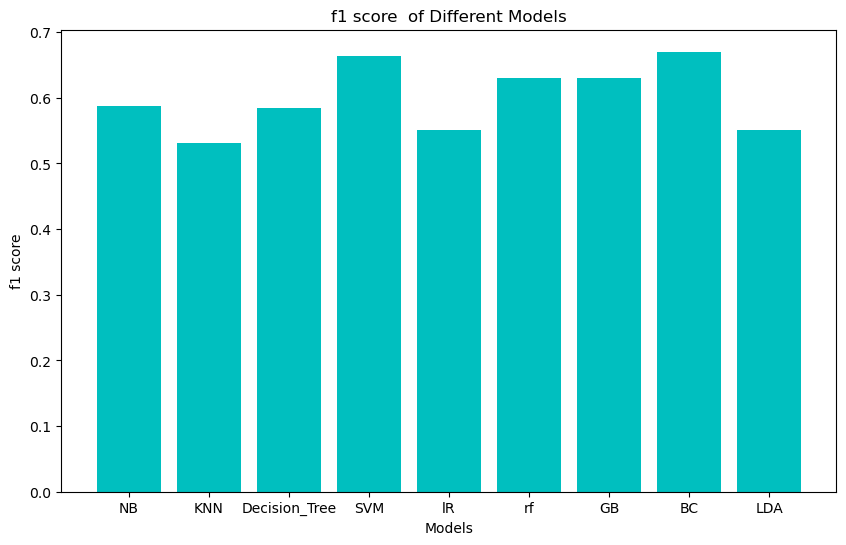

In [64]:
import matplotlib.pyplot as plt
import numpy as np
models = ["NB", "KNN", 'Decision_Tree', "SVM", "lR", 
          "rf", "GB", "BC", 
          "LDA"]
precision = [micro_f1 , micro_f1_knn,micro_f1_dt,micro_f1_svm, micro_f1_lry,micro_f1_rfy,micro_f1_gbc, micro_f1_bg,micro_f1_lda]
plt.figure(figsize=(10, 6))
bars = plt.bar(models, precision, color='c')  
plt.xlabel('Models') 
plt.ylabel('f1 score')  
plt.title('f1 score  of Different Models') 
plt.show()


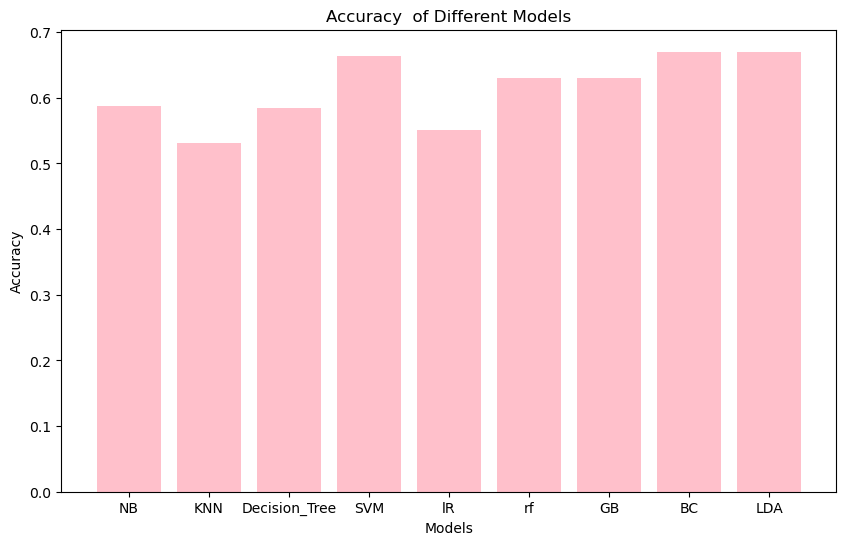

In [65]:
import matplotlib.pyplot as plt
import numpy as np
models = ["NB", "KNN", 'Decision_Tree', "SVM", "lR", 
          "rf", "GB", "BC", 
          "LDA"]
precision = [accur_score ,knn_accur_score,acc,accursvm_score, accurlr_score,accurrf_y_score,accurgb_y_score,accuracy ,accuracy]
plt.figure(figsize=(10, 6))
bars = plt.bar(models, precision, color='pink')  
plt.xlabel('Models') 
plt.ylabel('Accuracy') 
plt.title('Accuracy  of Different Models') 
plt.show()

## from the above accuracy of different models graphs we conclude that Bagging Classifier and Linear discriminant analysis model more accurate than other models 